DB_PATH: C:\GitHub\Global Solution 1\db\gs2025.db

📋 Tabelas existentes:


,name
0,indicadores_udh
1,igv_resultado
2,indicadores_udh_all
3,igv_resultado_all



📄 Estrutura da tabela 'igv_resultado_all':


,cid,name,type,notnull,dflt_value,pk
0,0,cod_id,REAL,0,None,0
1,1,udh_atlas,REAL,0,None,0
2,2,nome_udh,TEXT,0,None,0
3,3,nome_mun,TEXT,0,None,0
4,4,nome_uf,TEXT,0,None,0
5,5,regiao,TEXT,0,None,0
6,6,idhm,REAL,0,None,0
7,7,ren1,REAL,0,None,0
8,8,infraestrutura,REAL,0,None,0
9,9,t_rmaxidoso,REAL,0,None,0



🔥 Top 10 UDHs com maior IGV:


,nome_udh,nome_mun,regiao,igv
0,Zona Rural Itacoatiara,Itacoatiara (AM),manaus,0.666193
1,Rural : Serrania,SANTA MARIA DA BOA V,petrolina_juazeiro,0.639210
2,Divinópolis / Soares / Jenipapo / Vitória / Sa...,UNIÃO,teresina_timon,0.629253
3,Rural : Baixa Grande / Sobrado / Saquinho / La...,CASA NOVA,petrolina_juazeiro,0.624990
4,Monteiro / São João dos Perdidos / Cabeceira d...,TIMON,teresina_timon,0.621460
5,Palmeirinha / Graciosa / Assentamento Alvorada...,JOSÉ DE FREITAS,teresina_timon,0.616037
6,Careiro da Várzea,Careiro da Várzea (AM),manaus,0.614750
7,Antonio Marques / Zona Rural,Maranguape (CE),fortaleza,0.613757
8,Roncador / Bambum / Castelo / Fazenda Nova / C...,TIMON,teresina_timon,0.612540
9,Tanques : Zona Rural,Maranguape (CE),fortaleza,0.610870



📊 Média de IGV por região:


,regiao,total,media_igv
0,petrolina_juazeiro,176,0.306366
1,teresina_timon,328,0.283236
2,natal,324,0.269789
3,fortaleza,762,0.251723
4,maceio,354,0.234652
5,sl,252,0.229510
6,recife,920,0.221770
7,manaus,540,0.220260
8,belem,502,0.213804
9,salvador,802,0.199191



📈 Histograma geral do IGV:


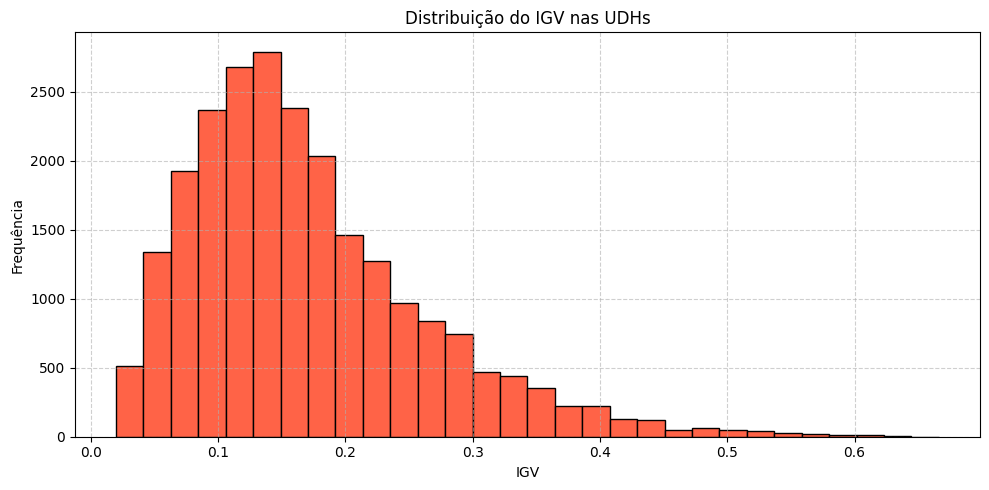

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Caminho do banco para Jupyter
DB_PATH = Path("../db/gs2025.db").resolve()
print("DB_PATH:", DB_PATH)

with sqlite3.connect(DB_PATH) as con:


    # === 3. Tabelas disponíveis ===
    print("\n📋 Tabelas existentes:")
    tabelas = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'", con)
    display(tabelas)

    # === 4. Estrutura da tabela IGV ===
    print("\n📄 Estrutura da tabela 'igv_resultado_all':")
    estrutura = pd.read_sql("PRAGMA table_info(igv_resultado_all)", con)
    display(estrutura)

    # === 5. Top 10 UDHs mais vulneráveis ===
    print("\n🔥 Top 10 UDHs com maior IGV:")
    top10 = pd.read_sql("""
        SELECT nome_udh, nome_mun, regiao, igv
        FROM igv_resultado_all
        ORDER BY igv DESC
        LIMIT 10
    """, con)
    display(top10)

    # === 6. Média de IGV por região ===
    print("\n📊 Média de IGV por região:")
    media_regiao = pd.read_sql("""
        SELECT regiao, COUNT(*) as total, AVG(igv) AS media_igv
        FROM igv_resultado_all
        GROUP BY regiao
        ORDER BY media_igv DESC
    """, con)
    display(media_regiao)

    # === 7. Histograma geral do IGV ===
    print("\n📈 Histograma geral do IGV:")
    df_all = pd.read_sql("SELECT igv FROM igv_resultado_all", con)

# === 8. Visualização do histograma ===
plt.figure(figsize=(10, 5))
plt.hist(df_all['igv'], bins=30, color='tomato', edgecolor='black')
plt.title("Distribuição do IGV nas UDHs")
plt.xlabel("IGV")
plt.ylabel("Frequência")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()